In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

2024-02-03 17:18:29.444131: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 17:18:29.444300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 17:18:29.629597: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**This notebook is dedicated to practicing CNN modeling.**

In [2]:
(train_set,train_labels) , (test_set , test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


*Taking a look at the Images*

In [3]:
def show_images(images , labels ,n_samples = 10):
  plt.figure(figsize = (12, 4))
  for i in range(n_samples) :
    index = np.random.randint(len(images))
    plt.subplot(2 , n_samples , i + 1)
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"Class {labels[index][0]}")
  plt.show()

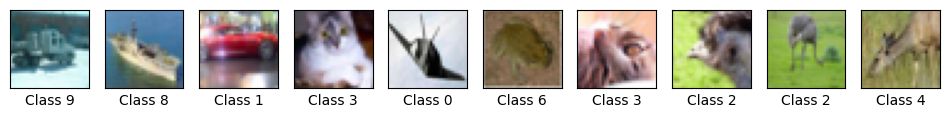

In [4]:
show_images(train_set , train_labels)

In [5]:
train_set, test_set = train_set / 255.0, test_set / 255.0

In [6]:
train_set.shape

(50000, 32, 32, 3)

In [7]:
test_set.shape

(10000, 32, 32, 3)

In [8]:
opt = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = 'accuracy'

**The Simplest Form of CNN**

In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,(3,3) , activation = 'relu' , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64 , activation = 'relu'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4817 - accuracy: 0.4727 - val_loss: 1.3172 - val_accuracy: 0.5355
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2201 - accuracy: 0.5732 - val_loss: 1.2171 - val_accuracy: 0.5715
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1124 - accuracy: 0.6113 - val_loss: 1.1366 - val_accuracy: 0.6028
Epoch 4/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0414 - accuracy: 0.6379 - val_loss: 1.1812 - val_accuracy: 0.5906
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9770 - accuracy: 0.6604 - val_loss: 1.0930 - val_accuracy: 0.6235


**Using Average Pooling**

In [10]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,(3,3) , activation = 'relu' , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.AveragePooling2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64 , activation = 'relu'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5498 - accuracy: 0.4477 - val_loss: 1.3212 - val_accuracy: 0.5233
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2675 - accuracy: 0.5518 - val_loss: 1.2371 - val_accuracy: 0.5613
Epoch 3/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1779 - accuracy: 0.5862 - val_loss: 1.1859 - val_accuracy: 0.5813
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1166 - accuracy: 0.6070 - val_loss: 1.2367 - val_accuracy: 0.5653
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0695 - accuracy: 0.6238 - val_loss: 1.1571 - val_accuracy: 0.5906


**Using Bigger filters and fully connected layer**

In [11]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(64,(3,3) , activation = 'relu' , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPooling2D (2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128 , activation = 'relu'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4176 - accuracy: 0.4971 - val_loss: 1.2030 - val_accuracy: 0.5718
Epoch 2/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1147 - accuracy: 0.6109 - val_loss: 1.0923 - val_accuracy: 0.6159
Epoch 3/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9750 - accuracy: 0.6615 - val_loss: 1.0437 - val_accuracy: 0.6324
Epoch 4/5
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8726 - accuracy: 0.6945 - val_loss: 1.0358 - val_accuracy: 0.6438
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7821 - accuracy: 0.7257 - val_loss: 1.0509 - val_accuracy: 0.6483


**Using Bigger fully connected layers to see if the validation accuracy will get higher**

In [12]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(64,(3,3) , activation = 'relu' , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPooling2D (2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(256 , activation = 'relu'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3731 - accuracy: 0.5119 - val_loss: 1.1765 - val_accuracy: 0.5738
Epoch 2/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0466 - accuracy: 0.6329 - val_loss: 1.0295 - val_accuracy: 0.6373
Epoch 3/5
1563/1563 [==============================] - 76s 48ms/step - loss: 0.8734 - accuracy: 0.6937 - val_loss: 1.0047 - val_accuracy: 0.6549
Epoch 4/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7299 - accuracy: 0.7428 - val_loss: 1.0493 - val_accuracy: 0.6512
Epoch 5/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6029 - accuracy: 0.7887 - val_loss: 1.1095 - val_accuracy: 0.6542


**Using Leaky Relu in simple cnn**

In [13]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,(3,3) , activation = 'LeakyReLU' , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64 , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4162 - accuracy: 0.5008 - val_loss: 1.2482 - val_accuracy: 0.5577
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1168 - accuracy: 0.6074 - val_loss: 1.1827 - val_accuracy: 0.5822
Epoch 3/5
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9910 - accuracy: 0.6542 - val_loss: 1.0524 - val_accuracy: 0.6330
Epoch 4/5
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8983 - accuracy: 0.6860 - val_loss: 1.0245 - val_accuracy: 0.6469
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8268 - accuracy: 0.7114 - val_loss: 1.0358 - val_accuracy: 0.6497


**Adding to the layers and making the cnn more complex**

In [14]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,(3,3) , activation = 'LeakyReLU' , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(64,(3,3) , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128 , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3398 - accuracy: 0.5210 - val_loss: 1.1210 - val_accuracy: 0.6048
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0076 - accuracy: 0.6478 - val_loss: 1.0226 - val_accuracy: 0.6438
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8762 - accuracy: 0.6939 - val_loss: 0.9653 - val_accuracy: 0.6686
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7833 - accuracy: 0.7272 - val_loss: 0.9433 - val_accuracy: 0.6872
Epoch 5/5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6994 - accuracy: 0.7557 - val_loss: 0.8870 - val_accuracy: 0.7028


**Adding same padding to the model**

In [15]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,(3,3) , padding='same' , activation = 'LeakyReLU'  , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(64,(3,3) , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128 , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 50s 31ms/step - loss: 1.2999 - accuracy: 0.5392 - val_loss: 1.1362 - val_accuracy: 0.5947
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9586 - accuracy: 0.6640 - val_loss: 0.9218 - val_accuracy: 0.6809
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8192 - accuracy: 0.7152 - val_loss: 0.8979 - val_accuracy: 0.6858
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7158 - accuracy: 0.7499 - val_loss: 0.8436 - val_accuracy: 0.7150
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6269 - accuracy: 0.7802 - val_loss: 0.8601 - val_accuracy: 0.7095


**Using bigger filters and more neurons**

In [16]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(64,(3,3) , padding='same' , activation = 'LeakyReLU'  , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(128,(3,3) , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(256 , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.2489 - accuracy: 0.5584 - val_loss: 1.0528 - val_accuracy: 0.6353
Epoch 2/5
1563/1563 [==============================] - 113s 72ms/step - loss: 0.9100 - accuracy: 0.6804 - val_loss: 0.9121 - val_accuracy: 0.6898
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 0.7593 - accuracy: 0.7344 - val_loss: 0.9165 - val_accuracy: 0.6868
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 0.6336 - accuracy: 0.7788 - val_loss: 0.8657 - val_accuracy: 0.7189
Epoch 5/5
1563/1563 [==============================] - 112s 72ms/step - loss: 0.5218 - accuracy: 0.8184 - val_loss: 0.9741 - val_accuracy: 0.6990


**Making The model more complex**

In [17]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(128,(3,3) , padding='same' , activation = 'LeakyReLU'  , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(256,(3,3) , padding='same' , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(512 , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 540s 345ms/step - loss: 1.2801 - accuracy: 0.5485 - val_loss: 1.1223 - val_accuracy: 0.6032
Epoch 2/5
1563/1563 [==============================] - 527s 337ms/step - loss: 0.9251 - accuracy: 0.6776 - val_loss: 1.0662 - val_accuracy: 0.6441
Epoch 3/5
1563/1563 [==============================] - 520s 333ms/step - loss: 0.7741 - accuracy: 0.7308 - val_loss: 0.9194 - val_accuracy: 0.6991
Epoch 4/5
1563/1563 [==============================] - 517s 331ms/step - loss: 0.6355 - accuracy: 0.7777 - val_loss: 0.9411 - val_accuracy: 0.6975
Epoch 5/5
1563/1563 [==============================] - 511s 327ms/step - loss: 0.5139 - accuracy: 0.8195 - val_loss: 0.9686 - val_accuracy: 0.7083


**Making a model with multiple layers and adding Regularization layers**

In [18]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32,(3,3) , padding='same' , activation = 'LeakyReLU'  , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.Conv2D(64,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(128,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.Conv2D(256,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(512 , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 652s 416ms/step - loss: 1.2976 - accuracy: 0.5397 - val_loss: 1.0155 - val_accuracy: 0.6398
Epoch 2/5
1563/1563 [==============================] - 681s 436ms/step - loss: 0.9703 - accuracy: 0.6639 - val_loss: 0.8463 - val_accuracy: 0.7079
Epoch 3/5
1563/1563 [==============================] - 666s 426ms/step - loss: 0.8708 - accuracy: 0.6973 - val_loss: 0.8458 - val_accuracy: 0.7130
Epoch 4/5
1563/1563 [==============================] - 678s 434ms/step - loss: 0.8018 - accuracy: 0.7248 - val_loss: 0.8141 - val_accuracy: 0.7211
Epoch 5/5
1563/1563 [==============================] - 673s 431ms/step - loss: 0.7555 - accuracy: 0.7395 - val_loss: 0.7937 - val_accuracy: 0.7328


*I reached a better accuracy and loss function in the test set here, so i'm going to continue this approach and try more*

**Making a model with more layers and smaller filters**

In [19]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32,(3,3) , padding='same' , activation = 'LeakyReLU'  , input_shape = [32,32,3]))
cnn.add(tf.keras.layers.Conv2D(32,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(64,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.Conv2D(64,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(128,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.Conv2D(128,(3,3) , padding='same' , activation = 'LeakyReLU' ))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(512 , activation = 'LeakyReLU'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(10 , activation = 'softmax') )
cnn.compile(opt,loss,metrics)
cnn.fit(train_set , train_labels , epochs = 5 , validation_data=(test_set, test_labels))

Epoch 1/5
1563/1563 [==============================] - 222s 141ms/step - loss: 1.3567 - accuracy: 0.5130 - val_loss: 0.9758 - val_accuracy: 0.6606
Epoch 2/5
1563/1563 [==============================] - 229s 146ms/step - loss: 0.9776 - accuracy: 0.6597 - val_loss: 0.8208 - val_accuracy: 0.7187
Epoch 3/5
1563/1563 [==============================] - 225s 144ms/step - loss: 0.8781 - accuracy: 0.6942 - val_loss: 0.7566 - val_accuracy: 0.7368
Epoch 4/5
1563/1563 [==============================] - 222s 142ms/step - loss: 0.8193 - accuracy: 0.7143 - val_loss: 0.7562 - val_accuracy: 0.7444
Epoch 5/5
1563/1563 [==============================] - 223s 143ms/step - loss: 0.7816 - accuracy: 0.7303 - val_loss: 0.7261 - val_accuracy: 0.7516
